In [1]:
import os 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
for i in df.columns:
    if df[i].dtype == "object":
        print("{} =>".format(i),df[i].unique())
        print("")

gender => ['female' 'male']

race_ethnicity => ['group B' 'group C' 'group A' 'group D' 'group E']

parental_level_of_education => ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

lunch => ['standard' 'free/reduced']

test_preparation_course => ['none' 'completed']



**The data does not contain any garbage value hence does not require cleaning**

In [5]:
df["Total_score"] =  df["math_score"] + df["writing_score"] + df["reading_score"]
df["Avg"] = df.Total_score/3

**Data Visualization**



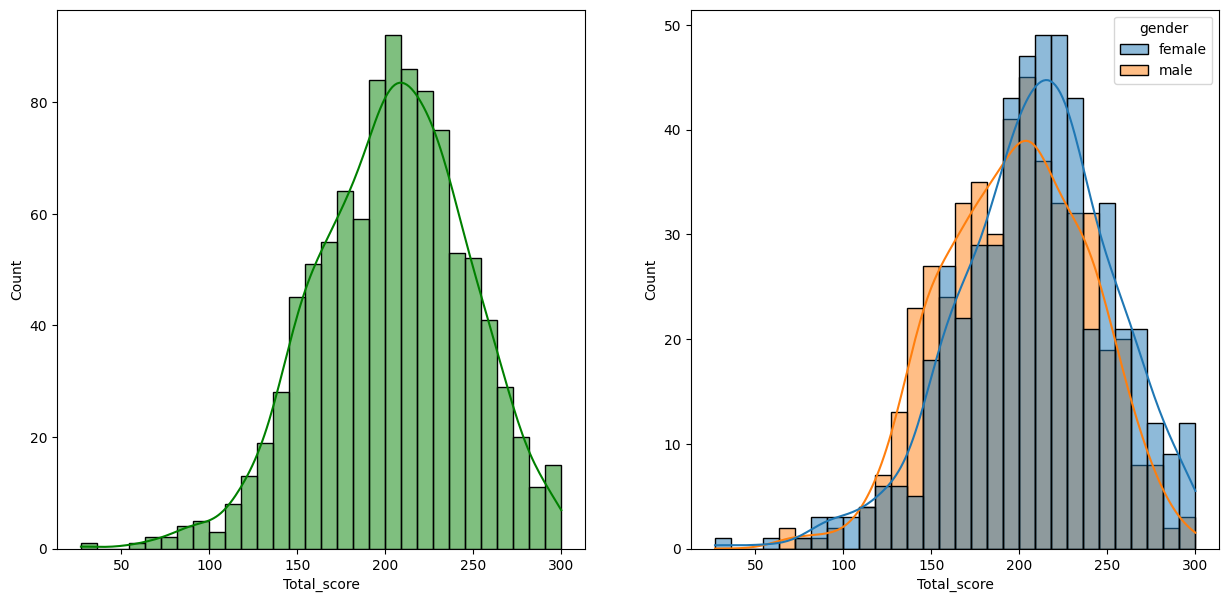

In [6]:
fig, axs = plt.subplots(1,2,figsize=(15, 7))

plt.subplot(121)
sns.histplot(data=df,x='Total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Total_score',bins=30,kde=True,color='g',hue = "gender")
plt.show()


**As we know that the type of lunch is a Factor affecting the marks we will check if the parents education has an infulence in the type of lunch the student gets**

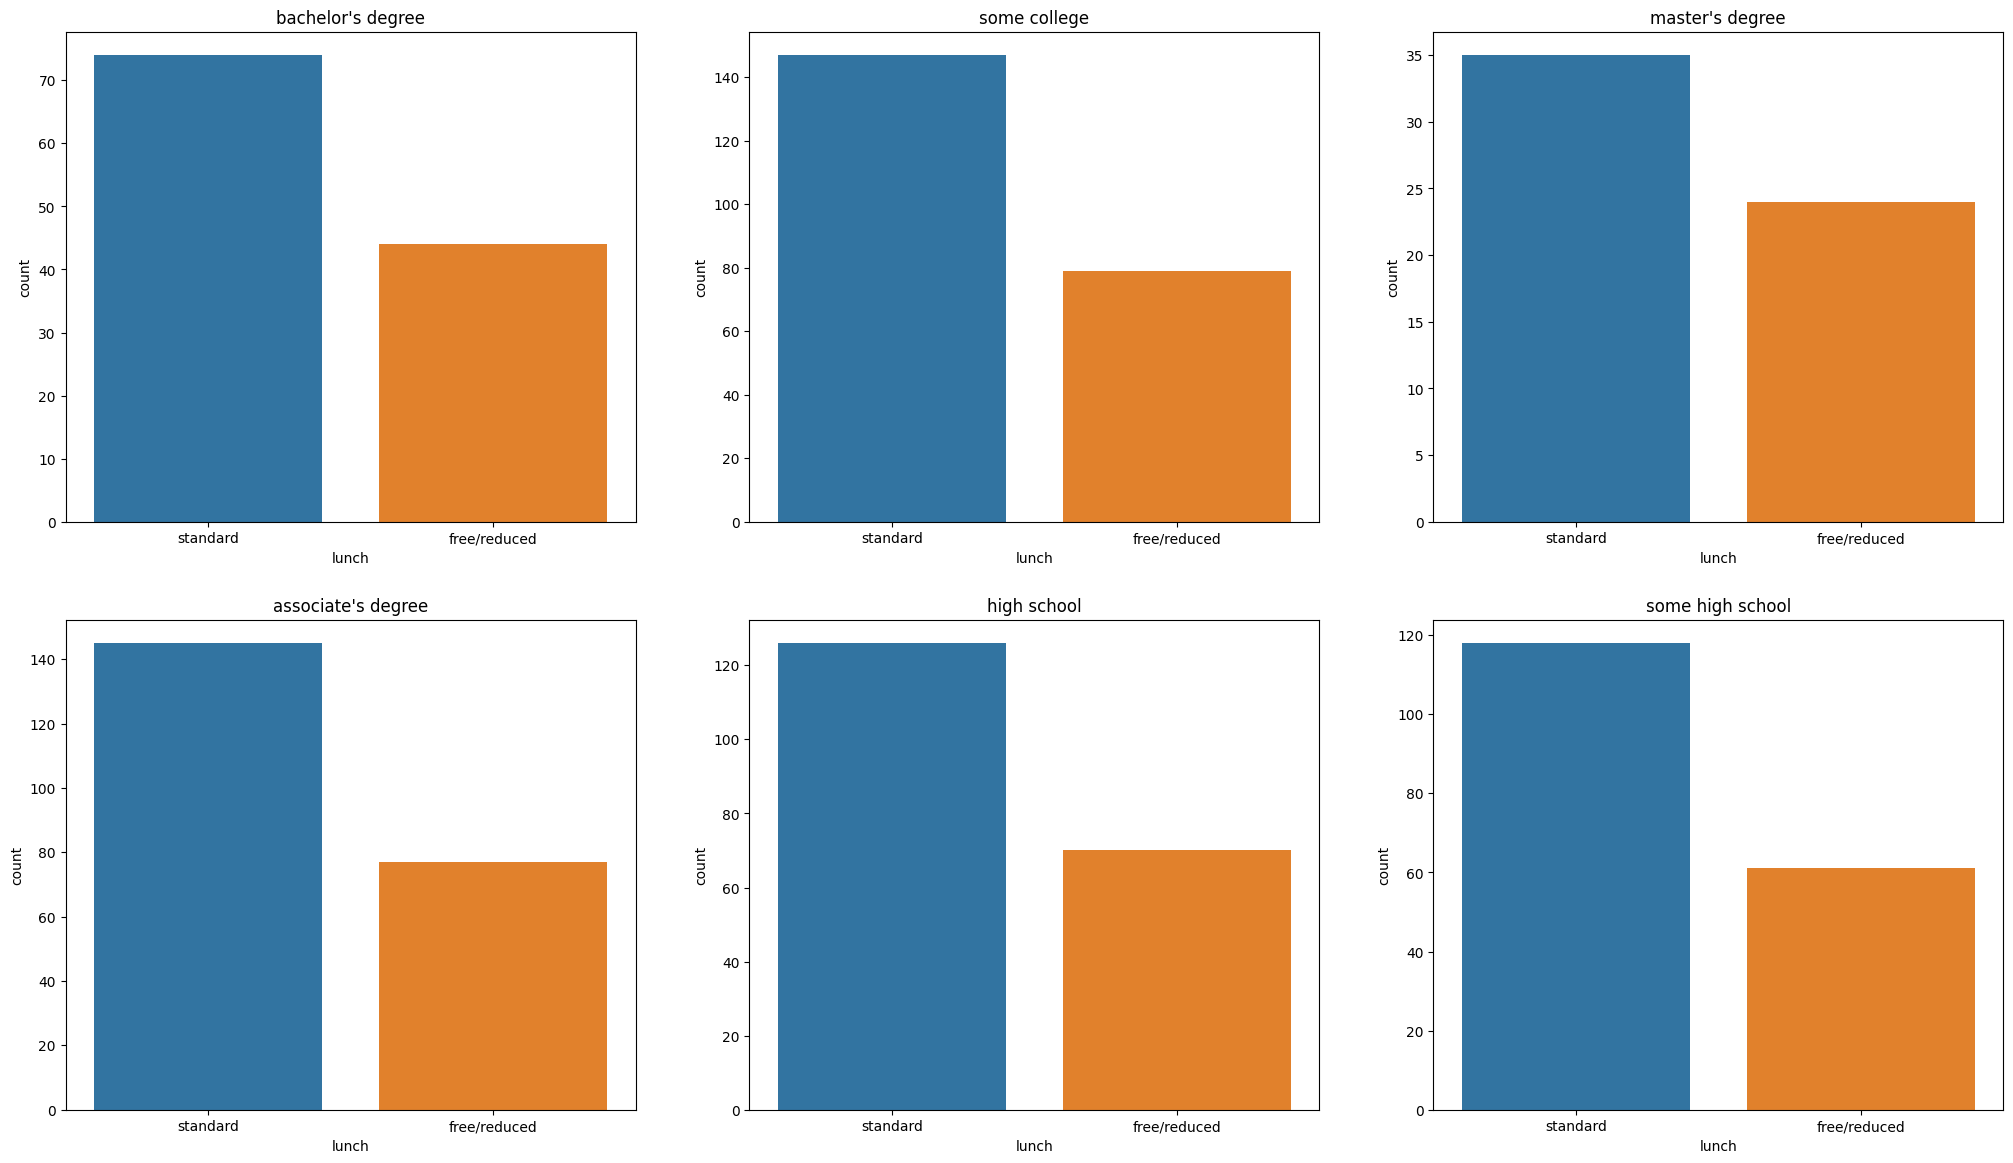

In [7]:
plt.subplots(2,3,figsize=(25,14))
connt = 1
parental_deg =  df.parental_level_of_education.unique()
for i in parental_deg:
    temp =  df[df.parental_level_of_education == "{}".format(i)]
    plt.subplot(2,3,connt)
    ax = sns.countplot(data = temp ,x = temp["lunch"],order=temp.lunch.value_counts().index)
    connt+=1
    plt.title("{}".format(i))
plt.show()  

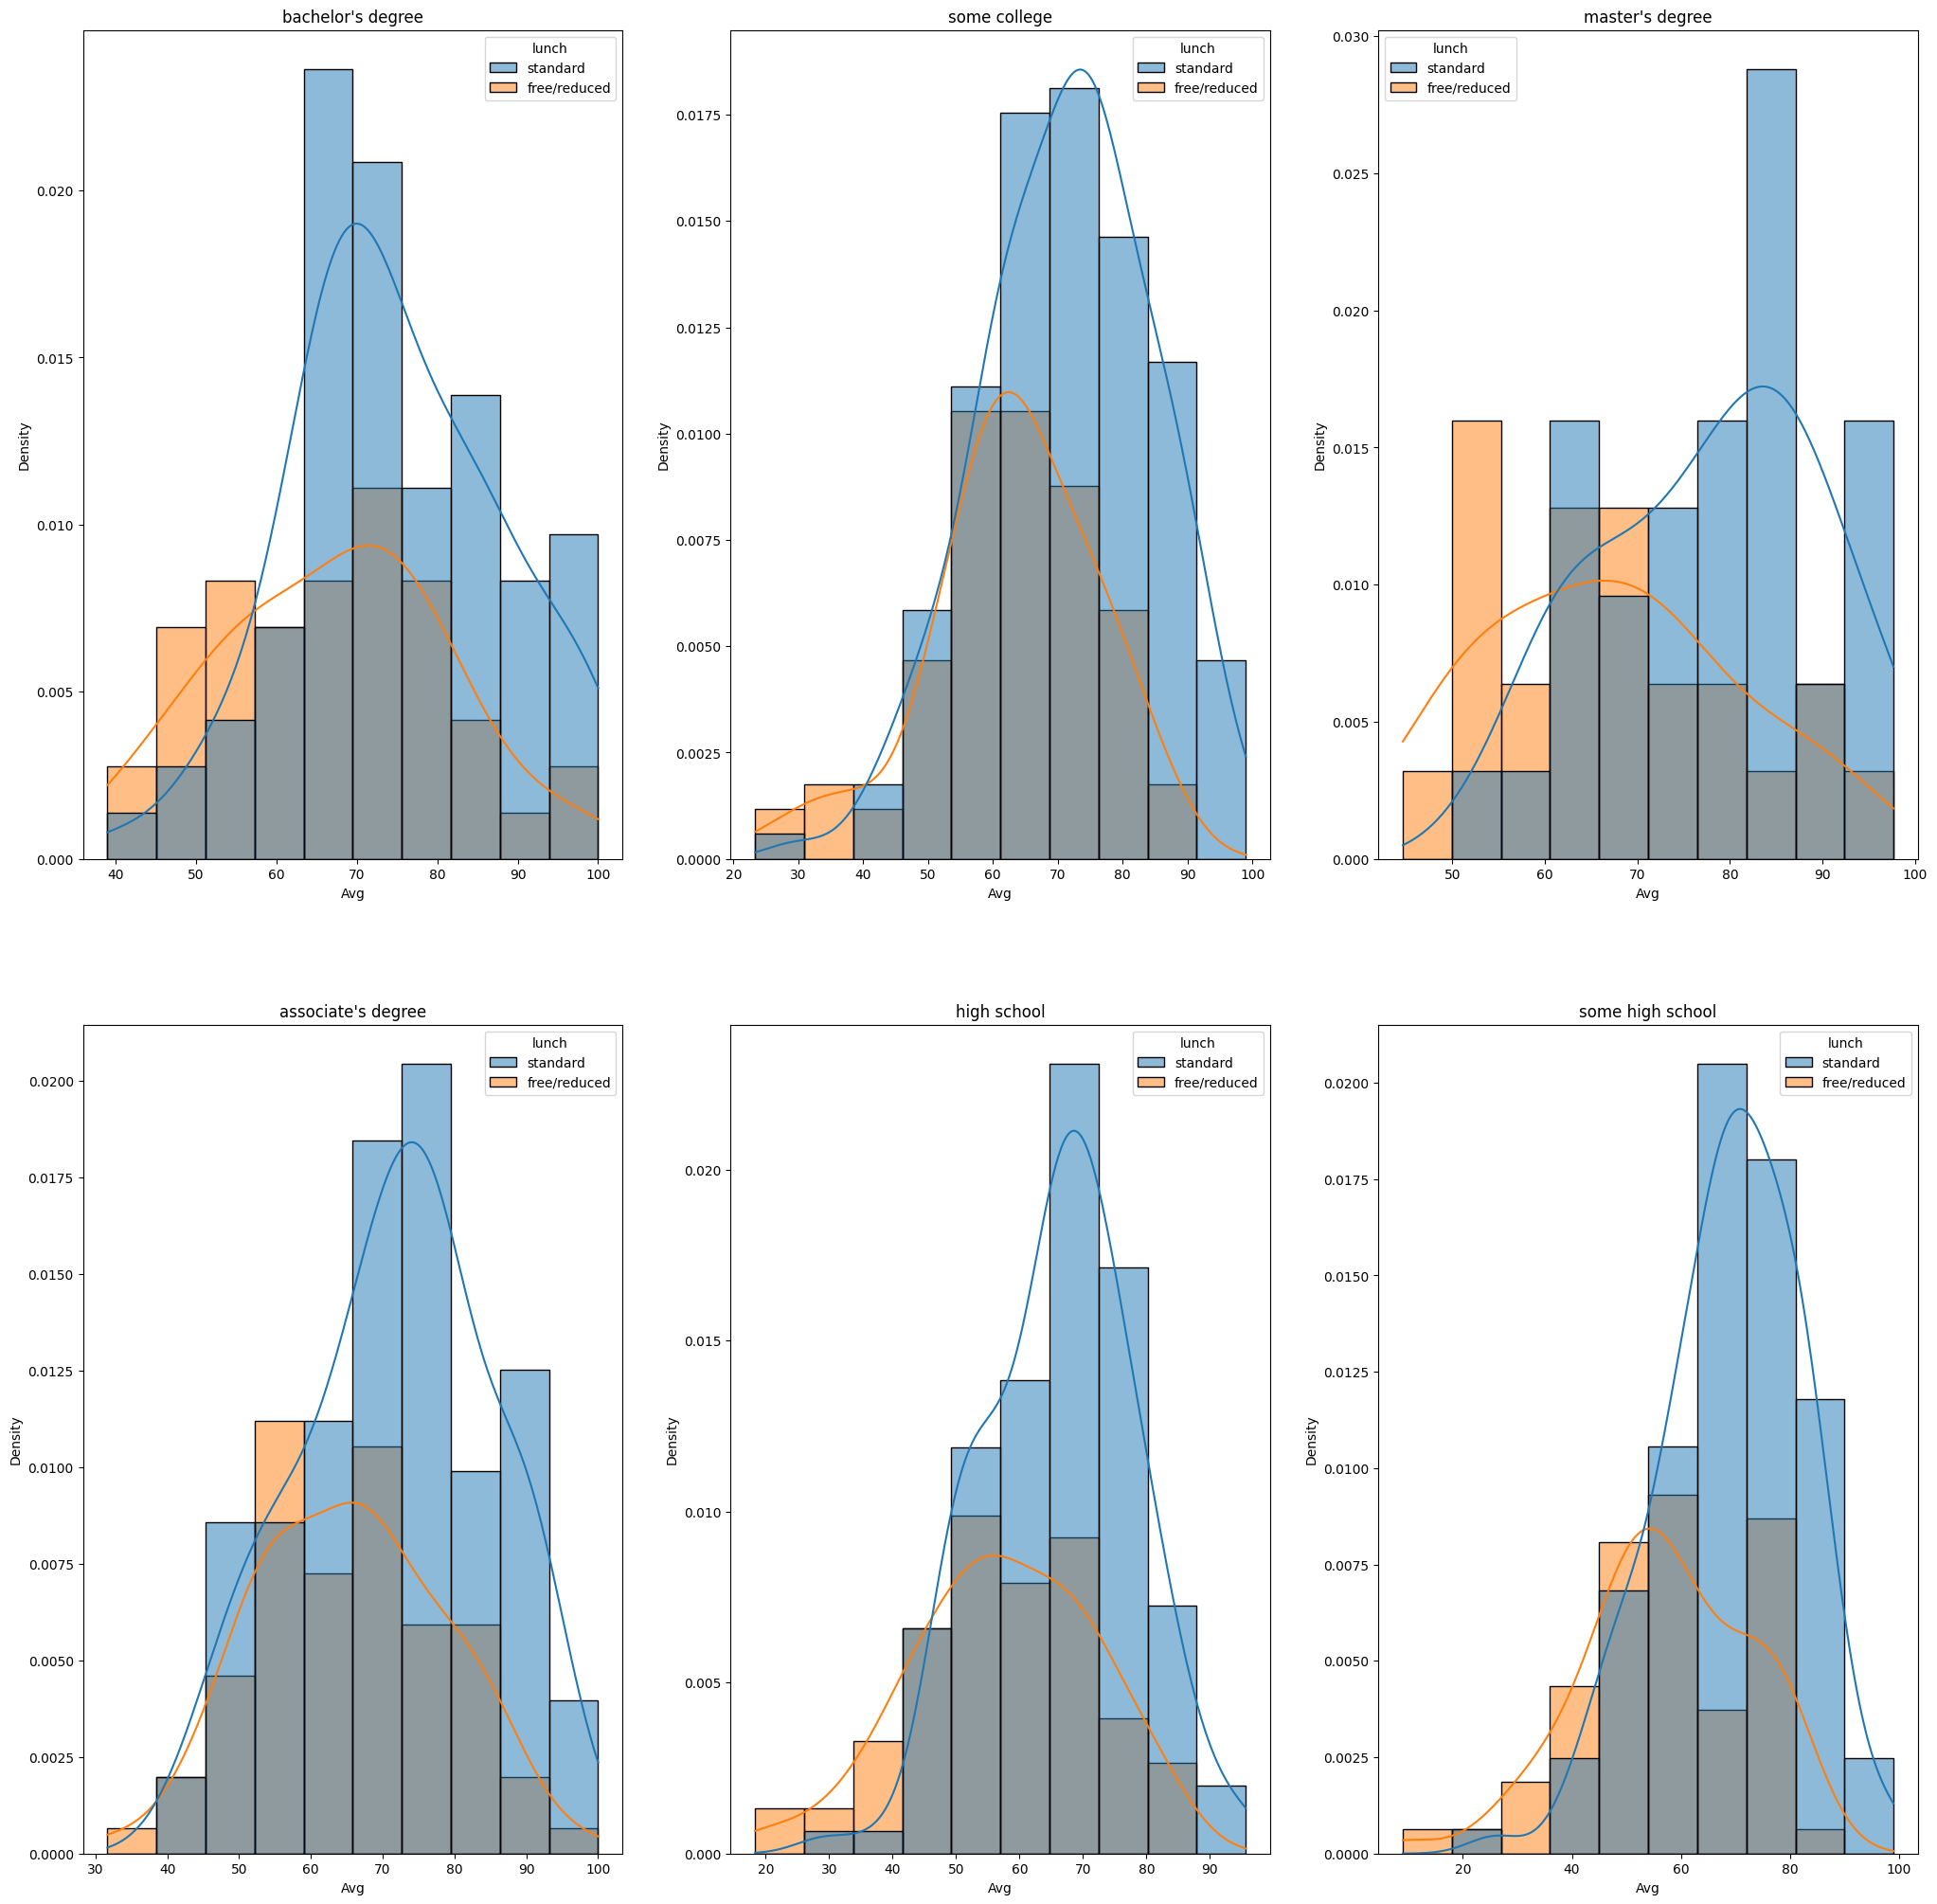

In [8]:
plt.subplots(2,3,figsize=(25,25))
connt = 1
parental_deg =  df.parental_level_of_education.unique()
for i in parental_deg:

    temp =  df[df.parental_level_of_education == "{}".format(i)]
    plt.subplot(2,3,connt)
    ax = sns.histplot(data = temp ,x = temp["Avg"],kde=True,hue = "lunch",stat="density",bins = 10,hue_order=df.lunch.value_counts().index)
    plt.title("{}".format(i))
    connt = connt + 1

plt.show()      

*** We Found that:**
 1) food is a contributing  factor on the marks**
 2) Parental Education does not influence the type of a lunch the student gets ***

C:\Users\rahul\AppData\Local\Temp\ipykernel_5440\2485459158.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\rahul\AppData\Local\Temp\ipykernel_5440\2485459158.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\rahul\AppData\Local\Temp\ipykernel_5440\2485459158.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


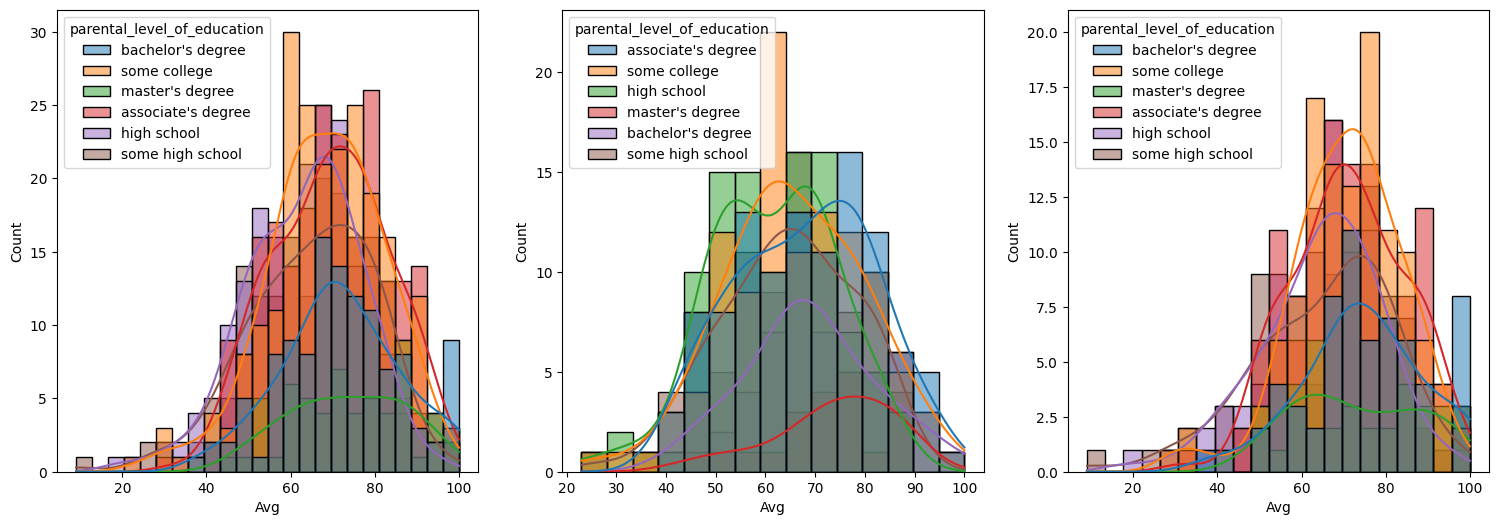

In [9]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='Avg',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='Avg',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='Avg',kde=True,hue='parental_level_of_education')
plt.show()

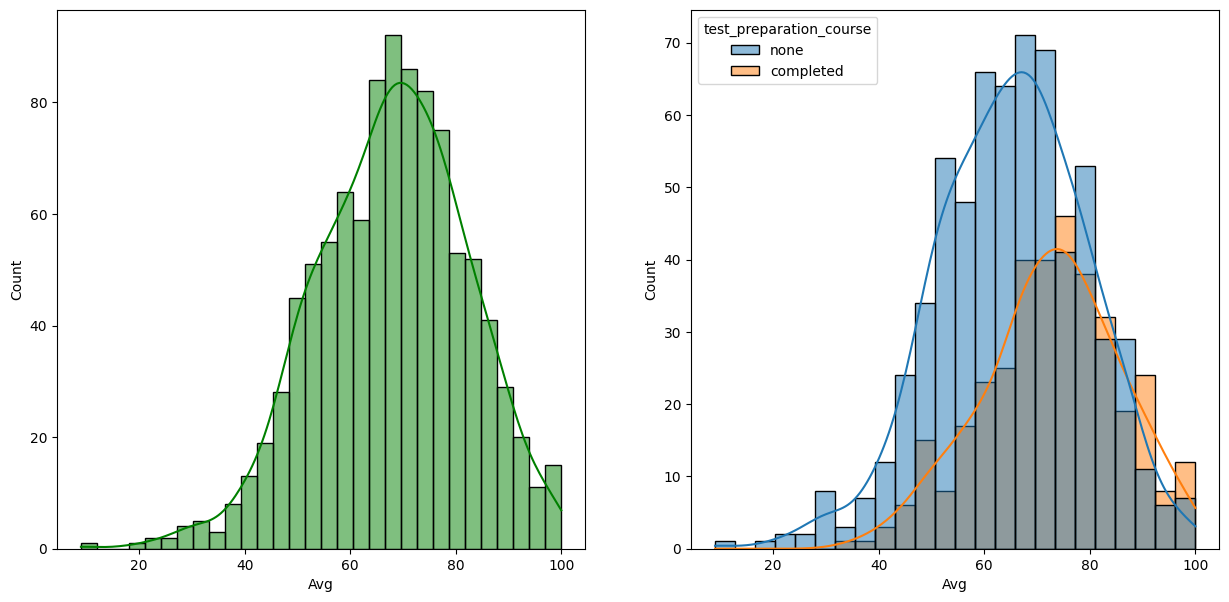

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Avg',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Avg',kde=True,hue='test_preparation_course')
plt.show()


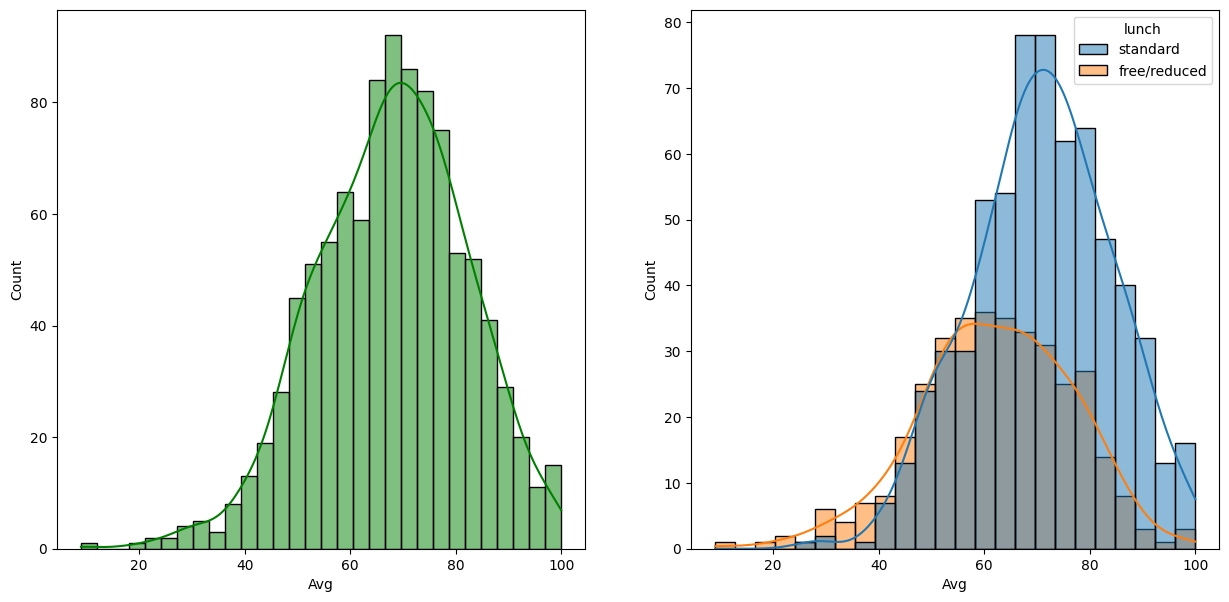

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Avg',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Avg',kde=True,hue='lunch')
plt.show()


In [12]:
m = df.parental_level_of_education.value_counts()
print(m)

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


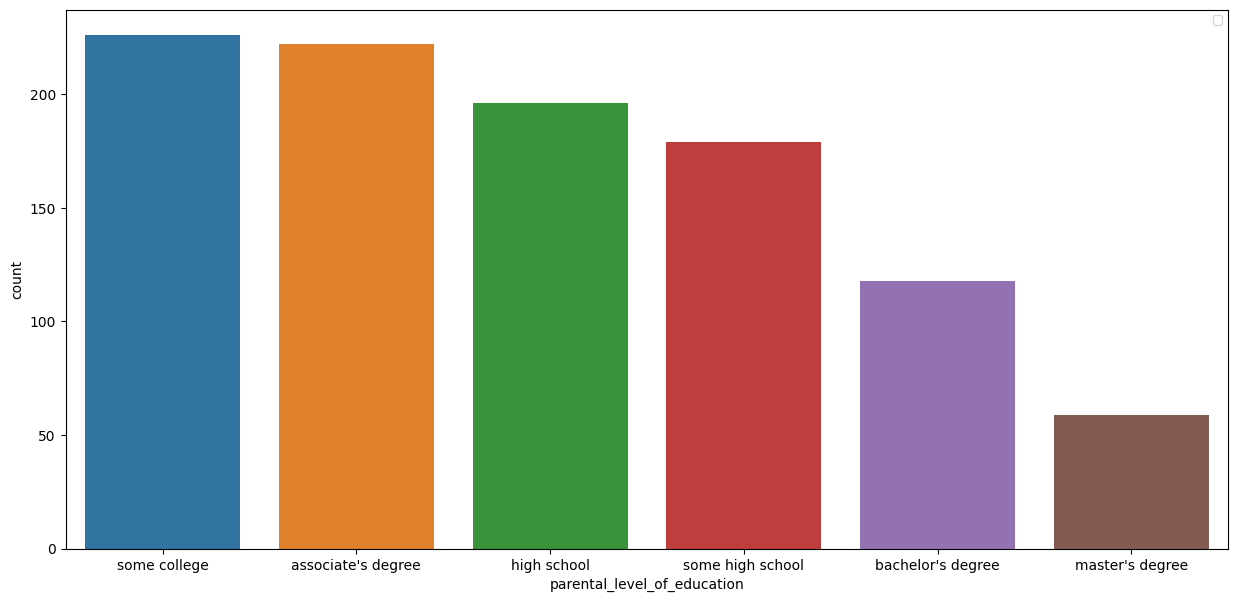

In [13]:
plt.subplots(1,1,figsize = (15,7))
ax = sns.countplot(df,x = "parental_level_of_education",order= df.parental_level_of_education.value_counts().index)
plt.legend(fontsize = "small")

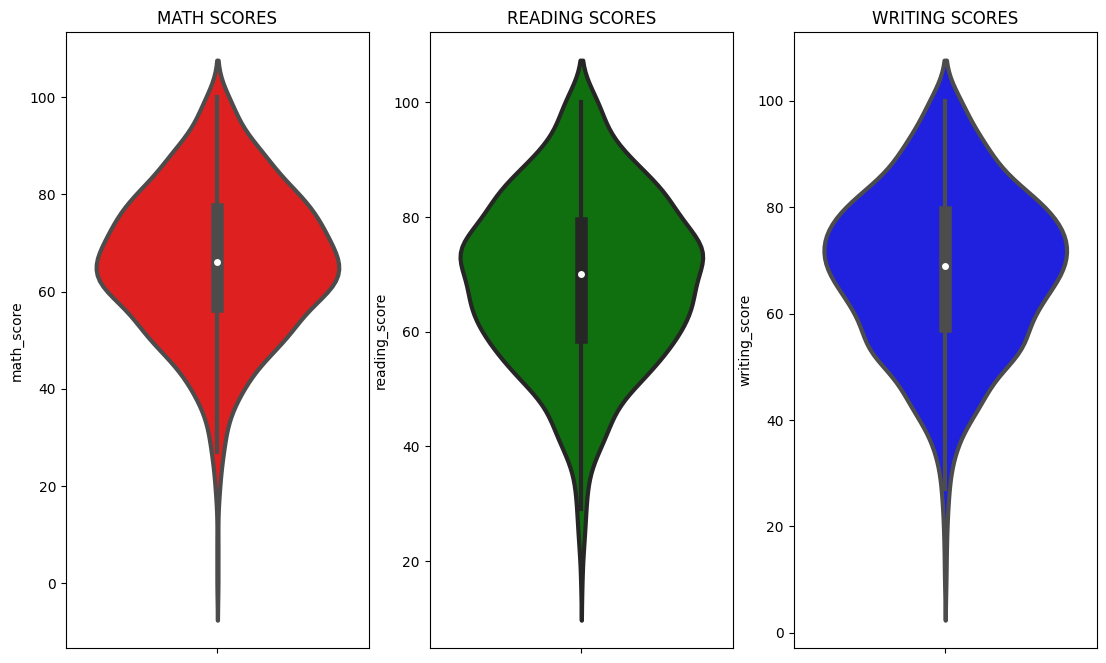

In [14]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

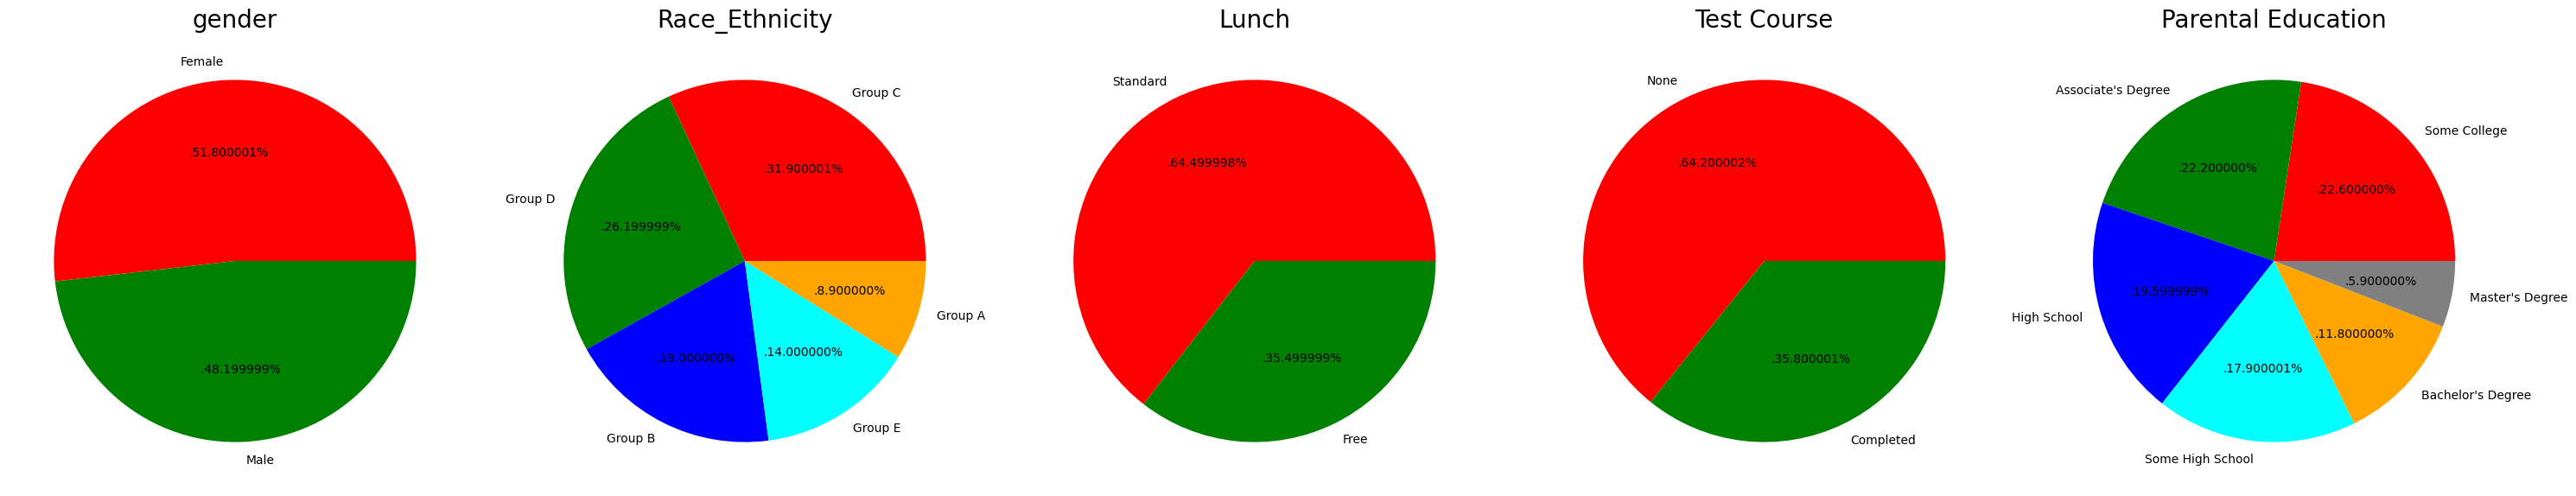

In [15]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

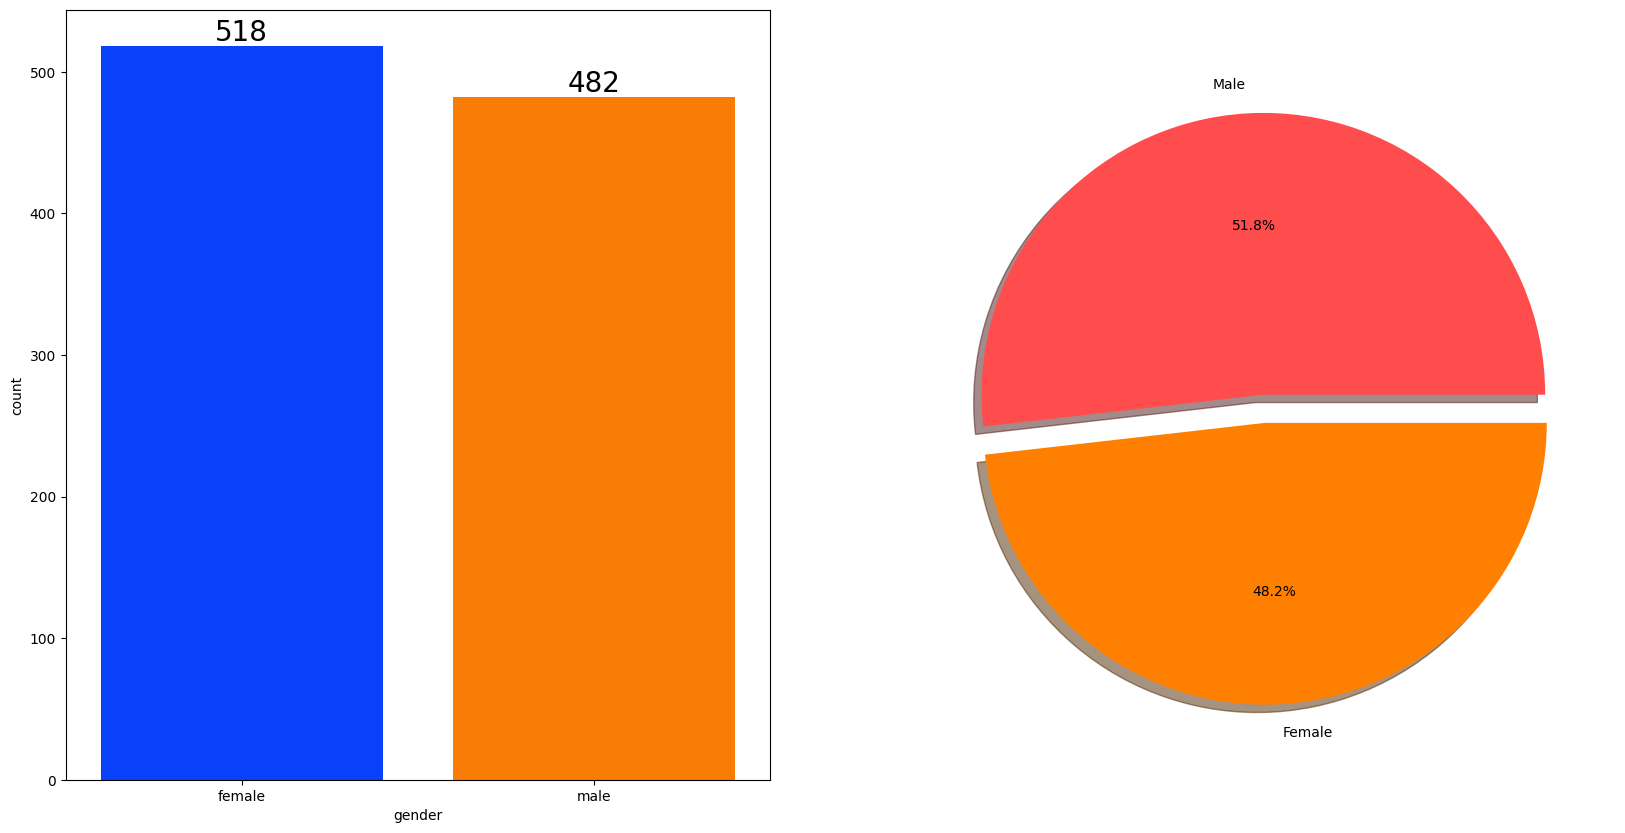

In [16]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

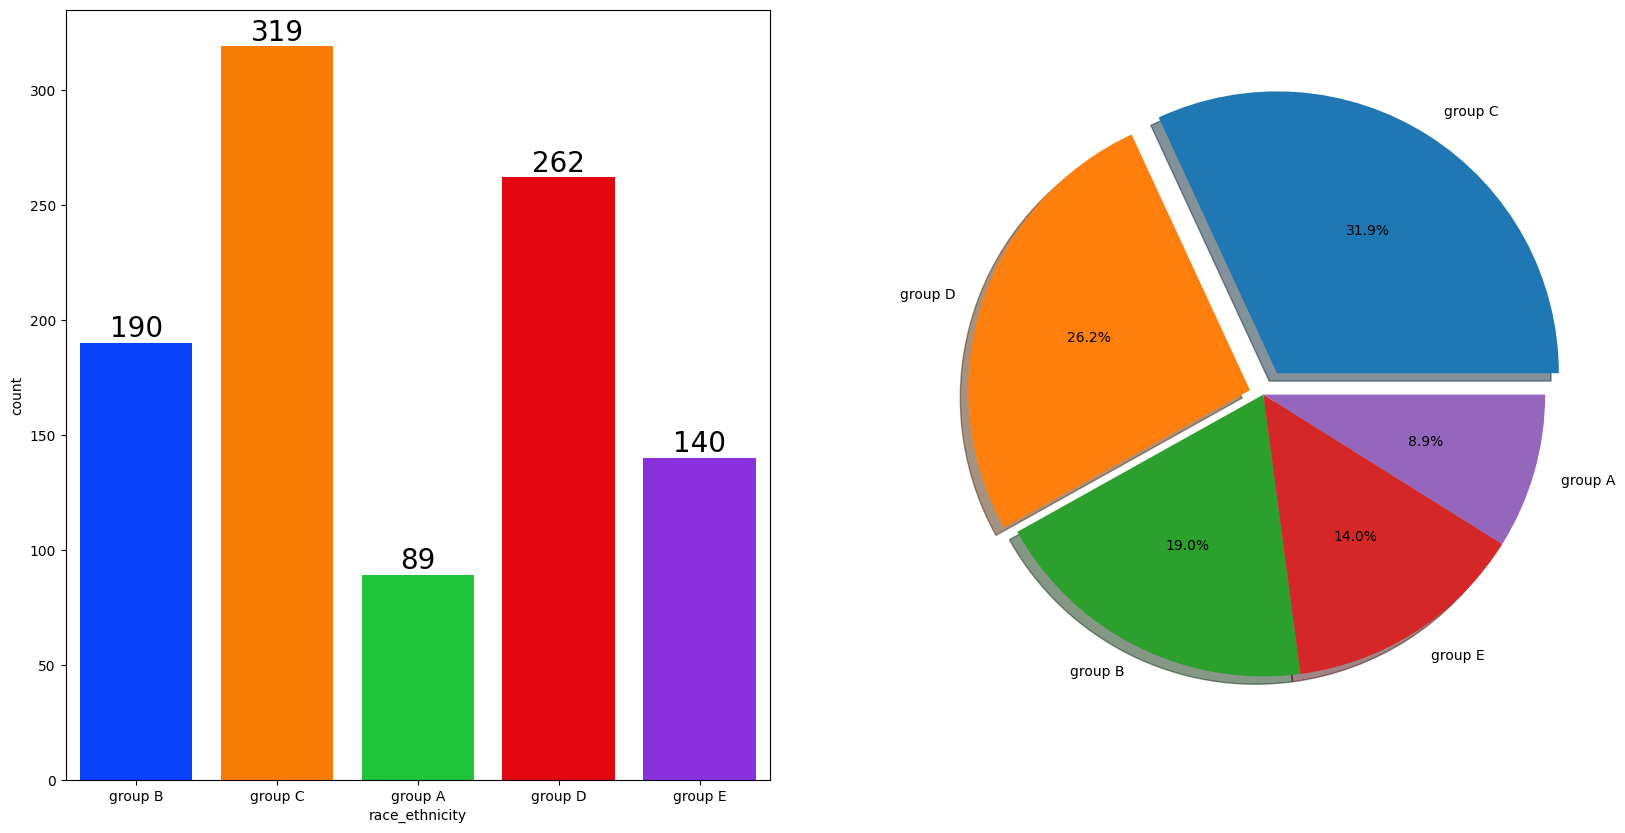

In [17]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.09,0.05,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

<Axes: xlabel='lunch', ylabel='writing_score'>

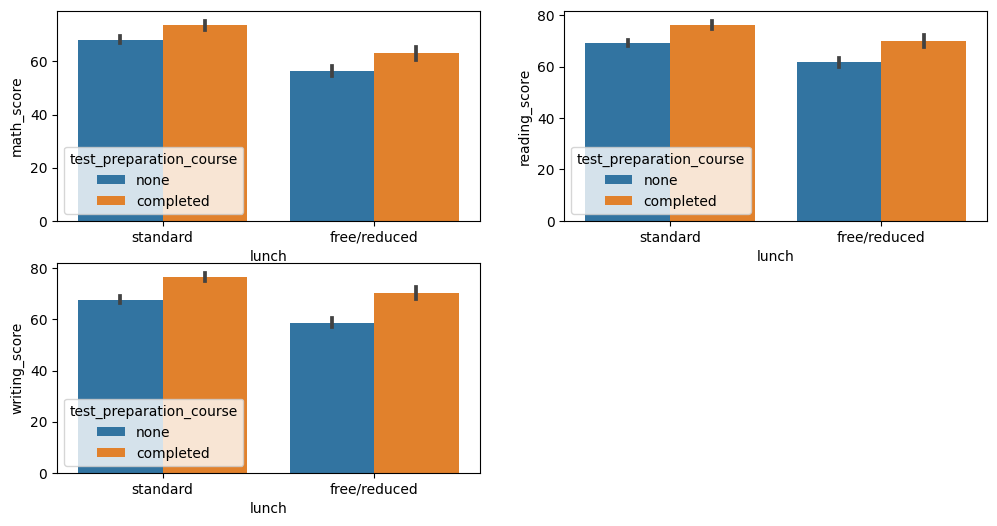

In [23]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

c:\Users\rahul\.conda\envs\ml-project\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


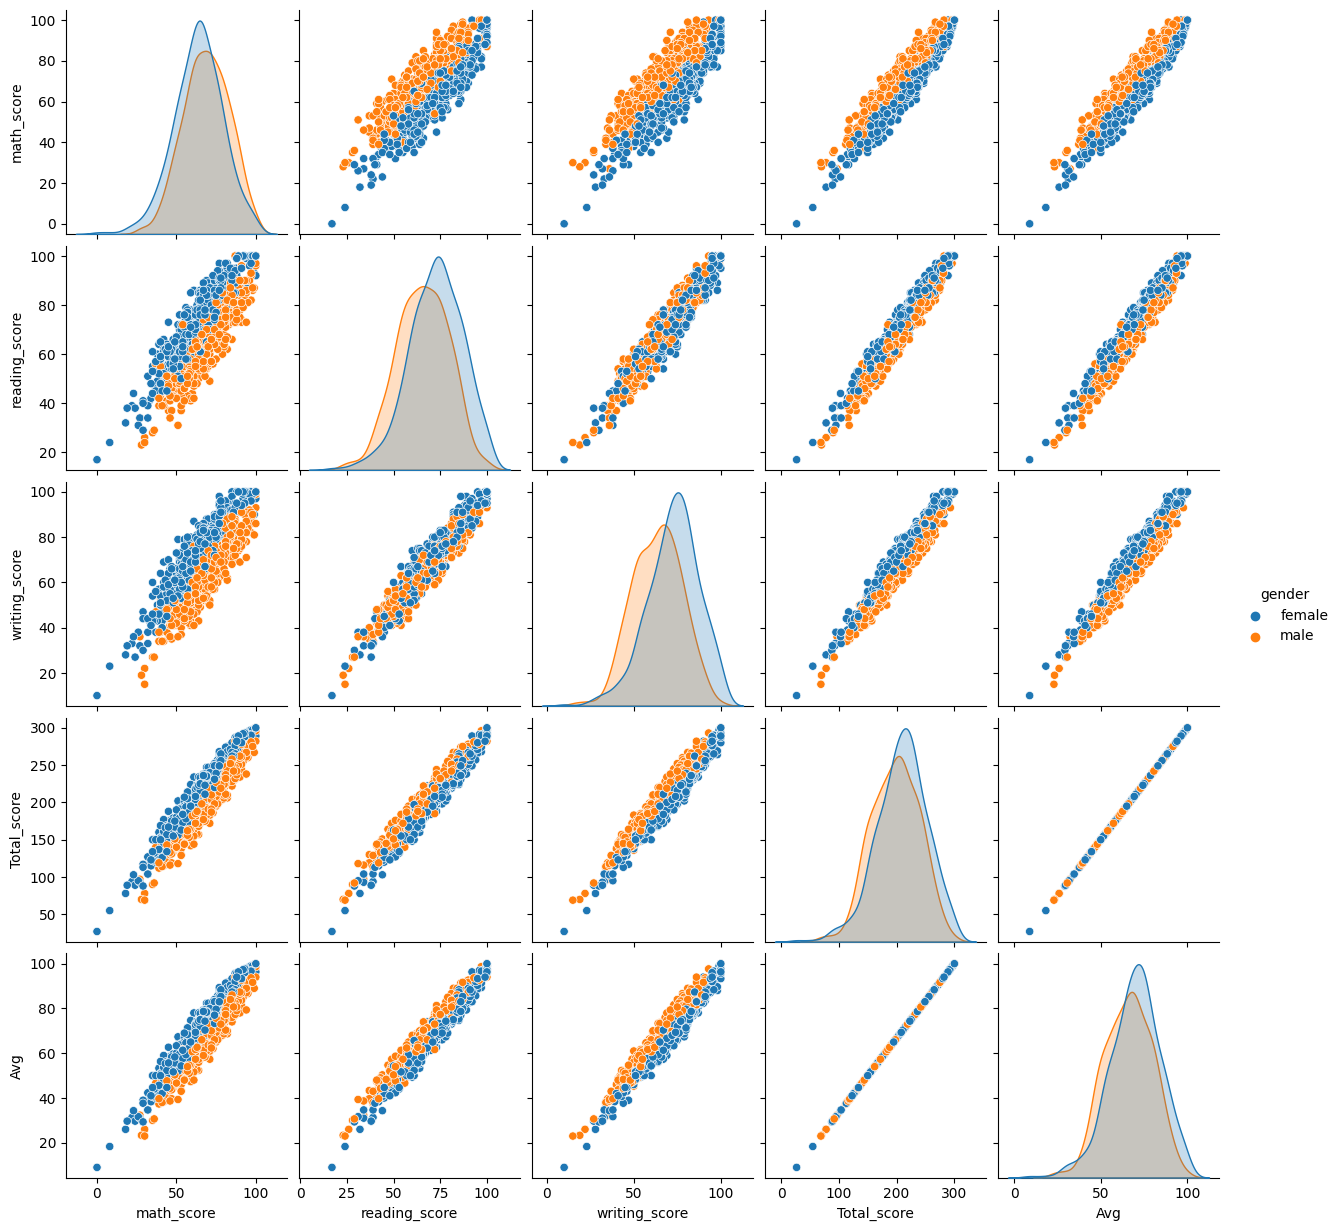

In [18]:
sns.pairplot(df,hue = 'gender')
plt.show()

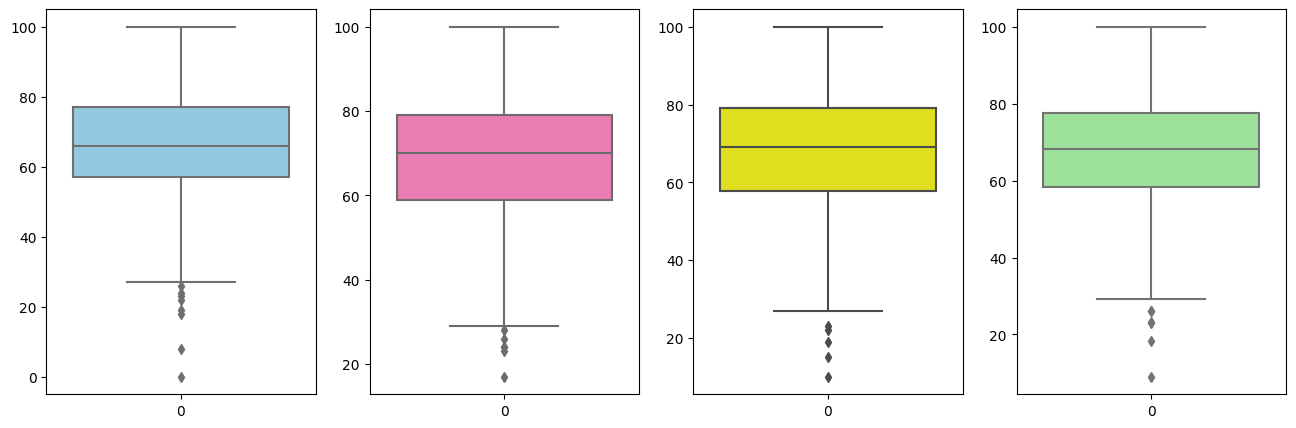

In [21]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Avg'],color='lightgreen')
plt.show()

***5. Conclusions***

1)Student's Performance is related with lunch, race, parental level education
2)Females lead in pass percentage and also are top-scorers
3)Student's Performance is not much related with test preparation course
4)Finishing preparation course is benefitial.